#### Notebook Objective<a id='Notebook Objective'></a>
In this notebook we'll be doing EDA with our cleaned data from the World Happiness report.

The goal is to understand how the data is put together and how the features relate to one another.

We also want to look for any unusual outliers and decide if they are significant enough to skew out data towards a particular region or type of country. 




#### Imports<a id='Imports'></a>

In [251]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import os

#### Load Data<a id='Load Data'></a>

In [252]:
clean_data = pd.read_csv('../data/interim/cleaned_data.csv', index_col = 0)

In [253]:
clean_data.head()

Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita   
0  Afghanistan         South Asia  2008     3.723590            7.350416  \
1  Afghanistan         South Asia  2009     4.401778            7.508646   
2  Afghanistan         South Asia  2010     4.758381            7.613900   
3  Afghanistan         South Asia  2011     3.831719            7.581259   
4  Afghanistan         South Asia  2012     3.782938            7.660506   

   Social Support  Healthy Life Expectancy At Birth   
0        0.450662                         50.500000  \
1        0.552308                         50.799999   
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption   
0                      0.718114    0.167652                   0.881686  \
1                      0.678896    0.190809                   0.850035   
2                      0.600127    0.121316                   0.706766   
3                      0.495901    0.163571                   0.731109   
4                      0.530935    0.237588                   0.775620   

   Positive Affect  Negative Affect  Confidence In National Government  
0         0.414297         0.258195                           0.612072  
1         0.481421         0.237092                           0.611545  
2         0.516907         0.275324                           0.299357  
3         0.479835         0.267175                           0.307386  
4         0.613513         0.267919                           0.435440

Looks good so far. 

#### Check the overall data characteristics<a id='Check the overall data characteristics'></a>

In [254]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1851 entries, 0 to 1850
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       1851 non-null   object 
 1   Regional Indicator                 1851 non-null   object 
 2   Year                               1851 non-null   int64  
 3   Life Ladder                        1851 non-null   float64
 4   Log GDP Per Capita                 1851 non-null   float64
 5   Social Support                     1851 non-null   float64
 6   Healthy Life Expectancy At Birth   1851 non-null   float64
 7   Freedom To Make Life Choices       1851 non-null   float64
 8   Generosity                         1851 non-null   float64
 9   Perceptions Of Corruption          1851 non-null   float64
 10  Positive Affect                    1851 non-null   float64
 11  Negative Affect                    1851 non-null   float64
 1

Looks like good data - no null values and all the data types match what we would expect based on 
The data wrangling that's been done. 

The data set has two obvious features that we can use to subset based on time and geography. 
We can break out the data by the year it was gathered, or by the geographical region, or both. 
Let's take a closer look at those features. 

In [255]:
#Years in the data
print('The data contains values from ' + str(len(clean_data['Year'].unique())) + ' different years')

#Countries in the data
print('The data contains values from ' + str(len(clean_data['Country Name'].unique())) + ' different countries')

#Regions in the data
print('The data contains values from ' + str(len(clean_data['Regional Indicator'].unique())) + ' different Regions')

The data contains values from 18 different years
The data contains values from 139 different countries
The data contains values from 10 different Regions


Lots of ways to slice and understand the data here. We can look at any of the features by country
by region or by year. 

We need to understand what kind of variations there are in these features. Especially if there 
are any serious outliers that might skew the data in a non-representative way. 

#### Overview of data numeric features<a id='Overview of data features'></a>

The below are histograms of several of the data features. These are all float type features
and correspond to the survey responses for the various contries. The "Year" column is not
shown.

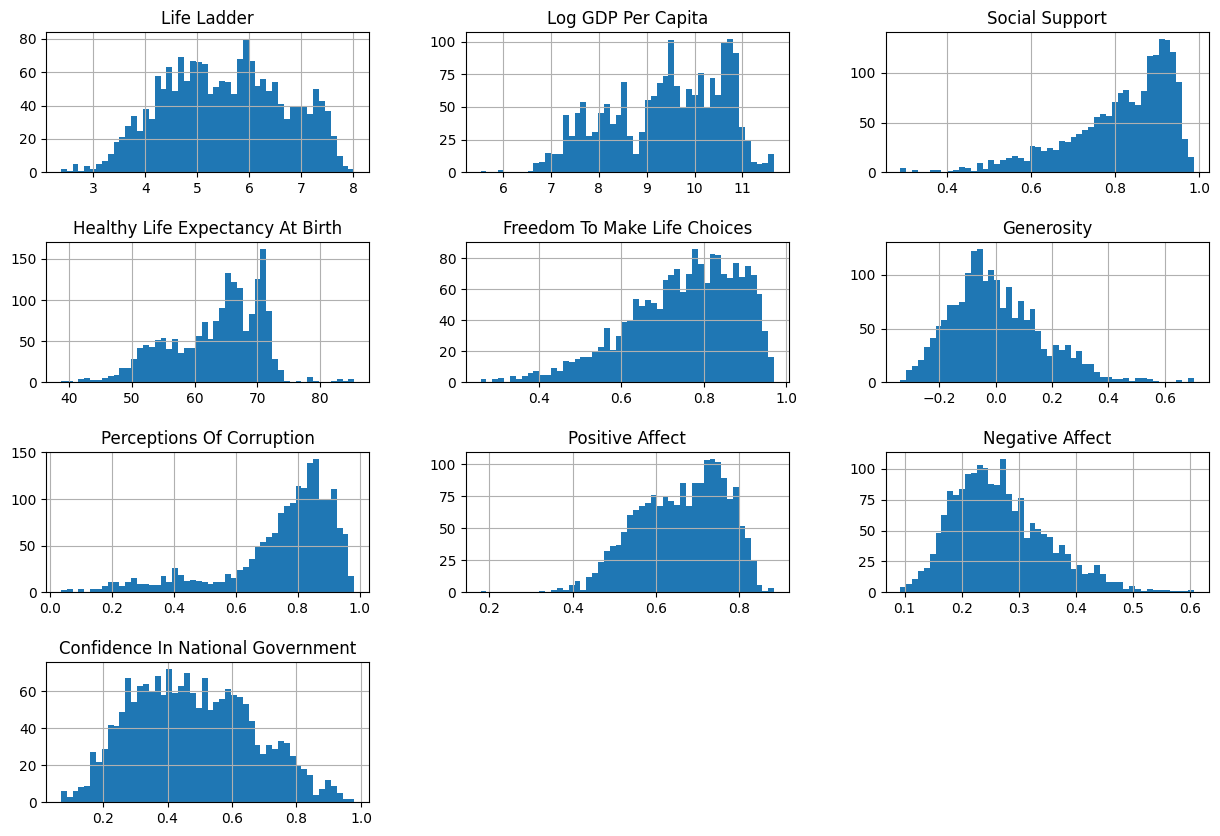

In [256]:
columns = ['Life Ladder', 'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government']

clean_data[columns].hist(figsize=(15,10), bins = 50)
plt.subplots_adjust(hspace=0.5);

There is a lot of skewness in these features. The 'life ladder' and 'Confidence In National Government'
features are sort of normal distributions but many of the others are skewed left or right. 
This isn't necessarily suprising given the diversity of countries in the world, and it doesn't seem to be problem. 
It indicates that we're getting variation amoung the countries surveyed.

#### Overall Correlations<a id='Overall Correlations'></a>

Before looking at regional data or searching for outliers, let's get an idea of what the trends are
for the whole data set in terms of correlations. 


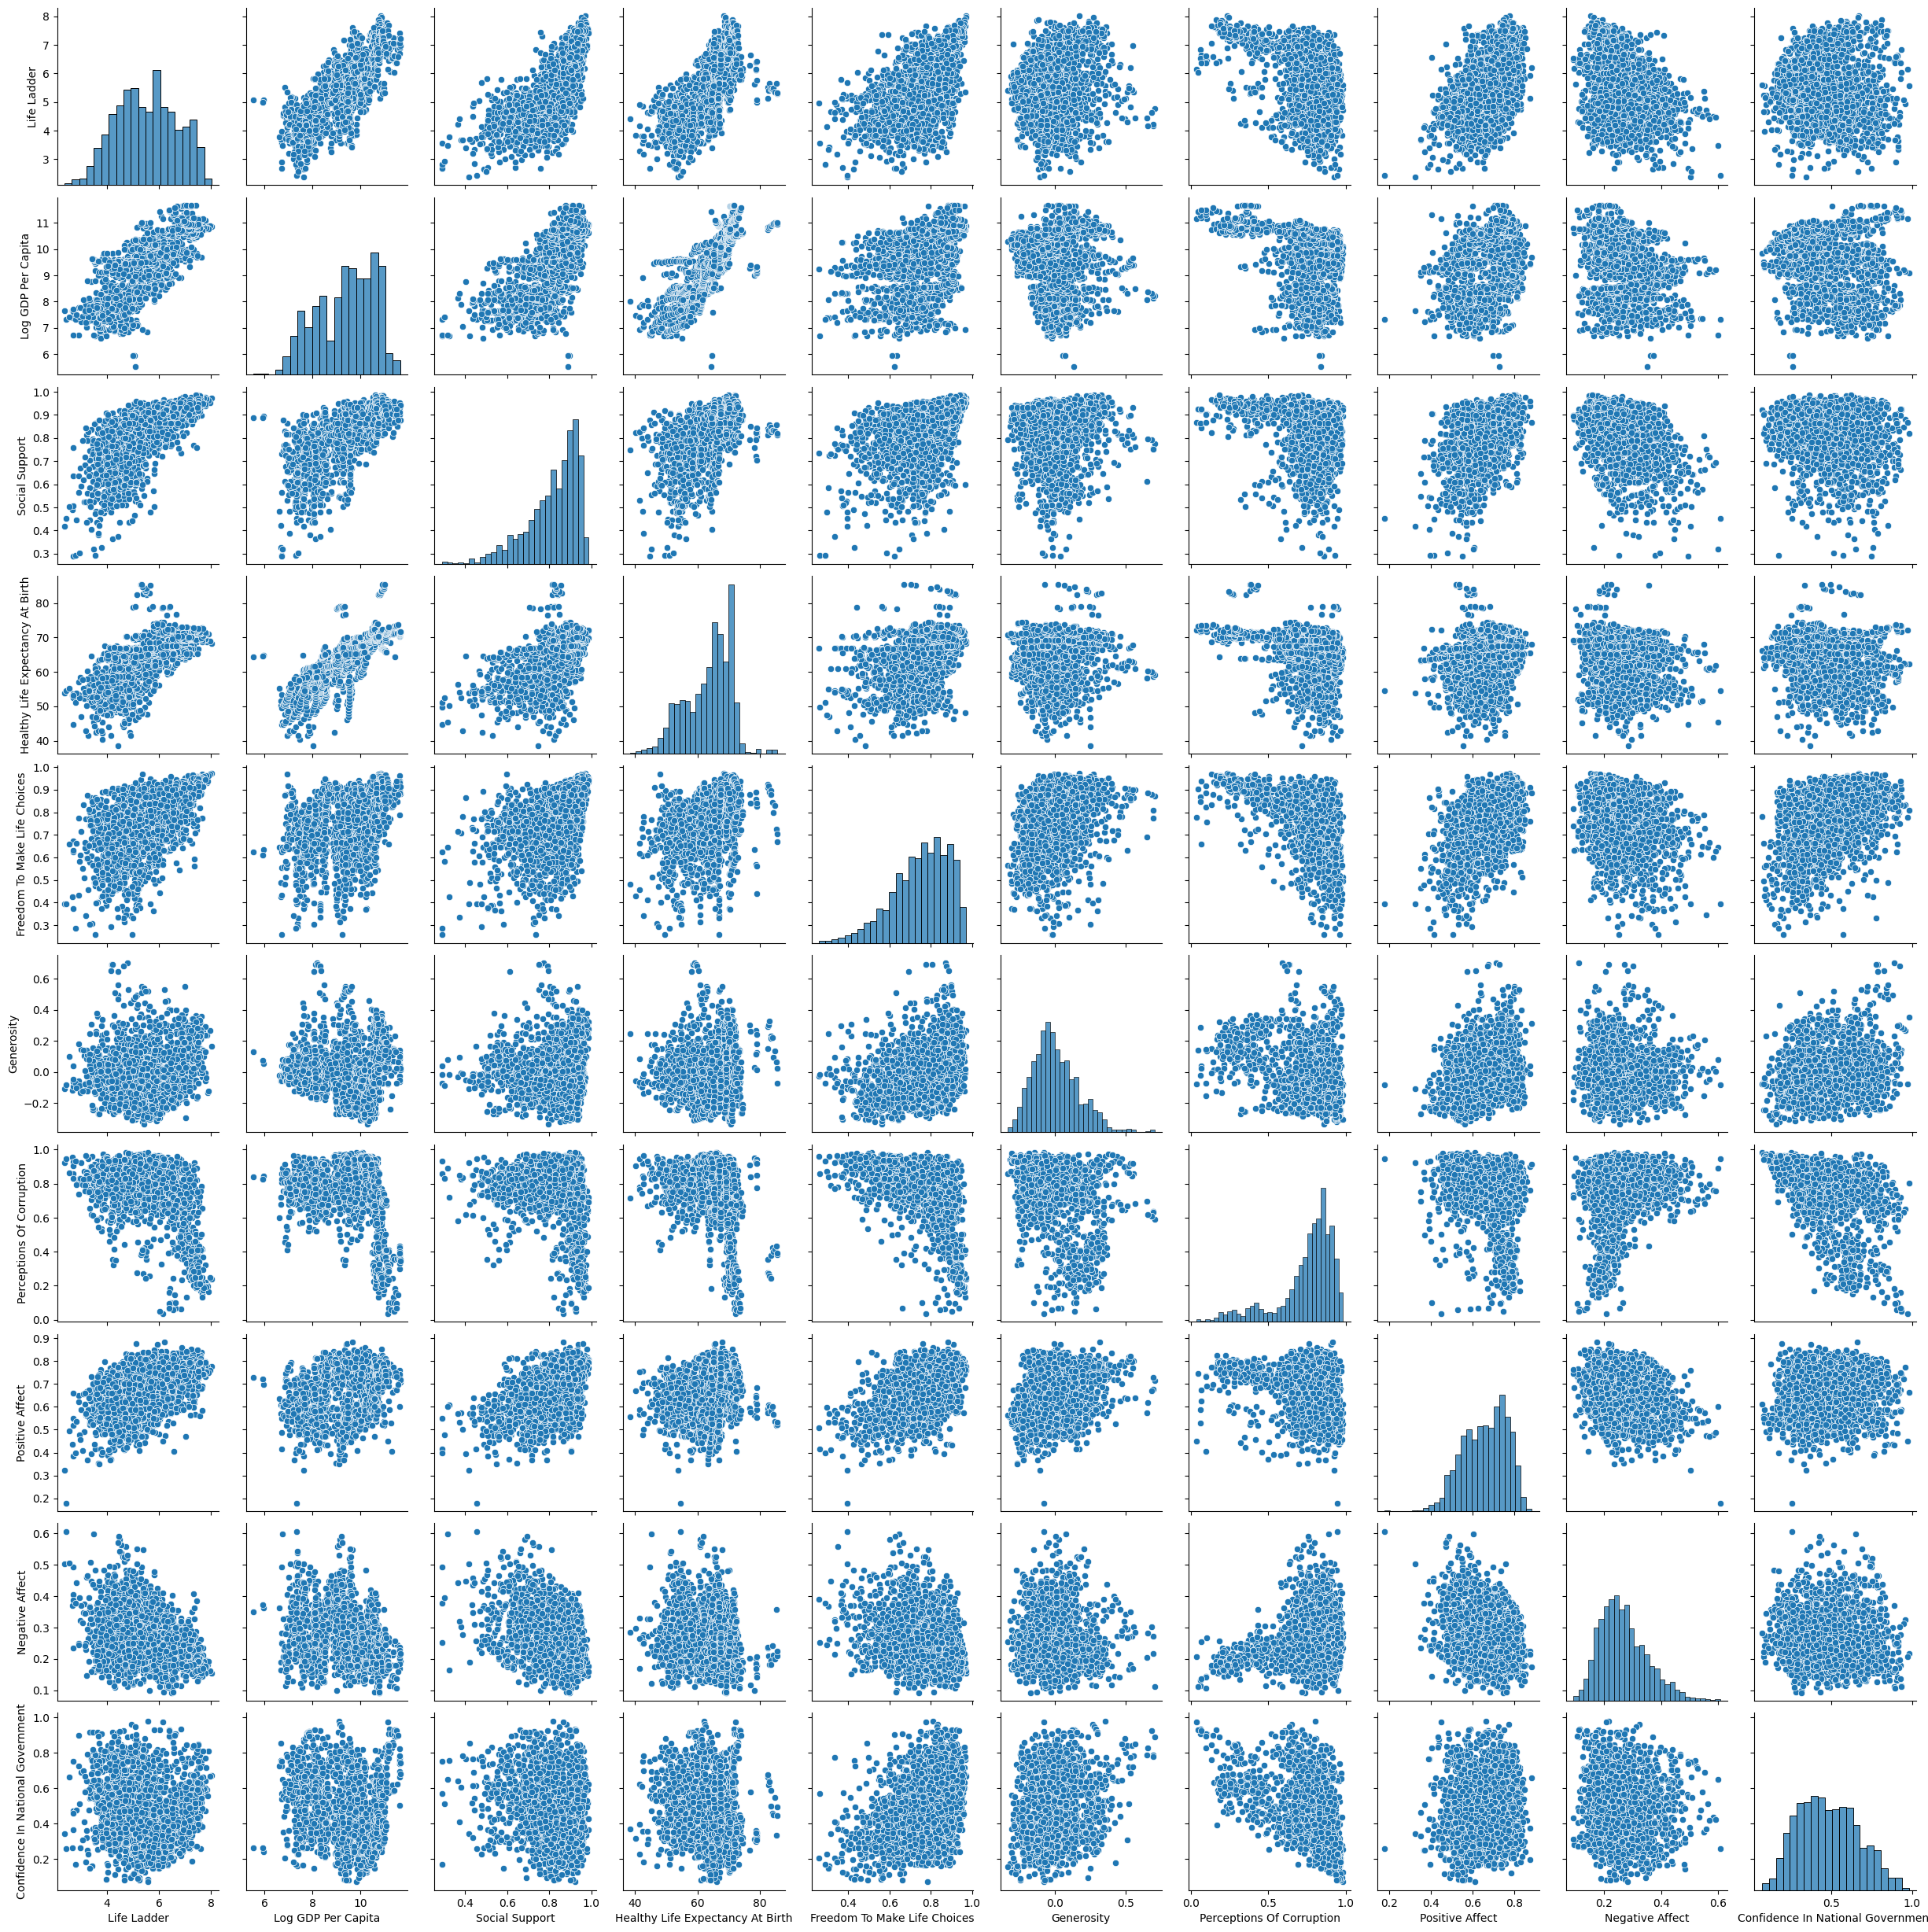

In [257]:
#Make a pair plot of the following columns:
# ['Life Ladder', 'Log GDP Per Capita', 'Social Support','Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
#'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
#'Negative Affect', 'Confidence In National Government']

sns.pairplot(clean_data[columns])
plt.show()

Some very strong correlations here, for example between GDP and life expectancy (positive), or between perceptions of corruption and confidence in national government (negative).
At first glance a lot of the easily observable coorelations make intuitive sense.  

This is survey data, so there are all kinds of reasons why the data gathered might be messy, biased or generally inaccurate in some dimension. 
The modeling stage should help tease out some broad relationships, but in general we shouldn't expect really granular insights from a data set like this.

There are two obvious observations here: 

First is how many of the features appear unrealted to each other. There are a lot of undifferentiated and blobby plots that looks like they have low correlation.
Some of the plots (see "Freedom To Make Life Choices" vs. "Perceptions of Corruption") have a definite direction, and a high correlation score (in this case -0.5 - see below),
but the shape of the plot does not seem to be an obvious match the high correlation score. 
It looks like some of the data is either missing or like there might be an additional factor accounting for the variation. 
It's not obvious what the relationship is based on the numbers, even though in this case it makes intuitive sense that "Freedom To Make Life Choices" and "Perceptions of Corruption"
would have an inverse relationship of some sort.

Second is that there are plots here where there is an abrupt change in the y values after a certain x value. Healthy life expectancy vs. Negative affect is a good example of this.
It looks like after a certain life expectancy is reached the scores for negative affect become much less variable. Is this a real trend, or do we just have fewer samples of
high life expectancy in the data to choose from, and therefore a sparse data set at a certain point?

Below we'll make  heatmap to better understand what the correlations here are in terms of the numbers. 



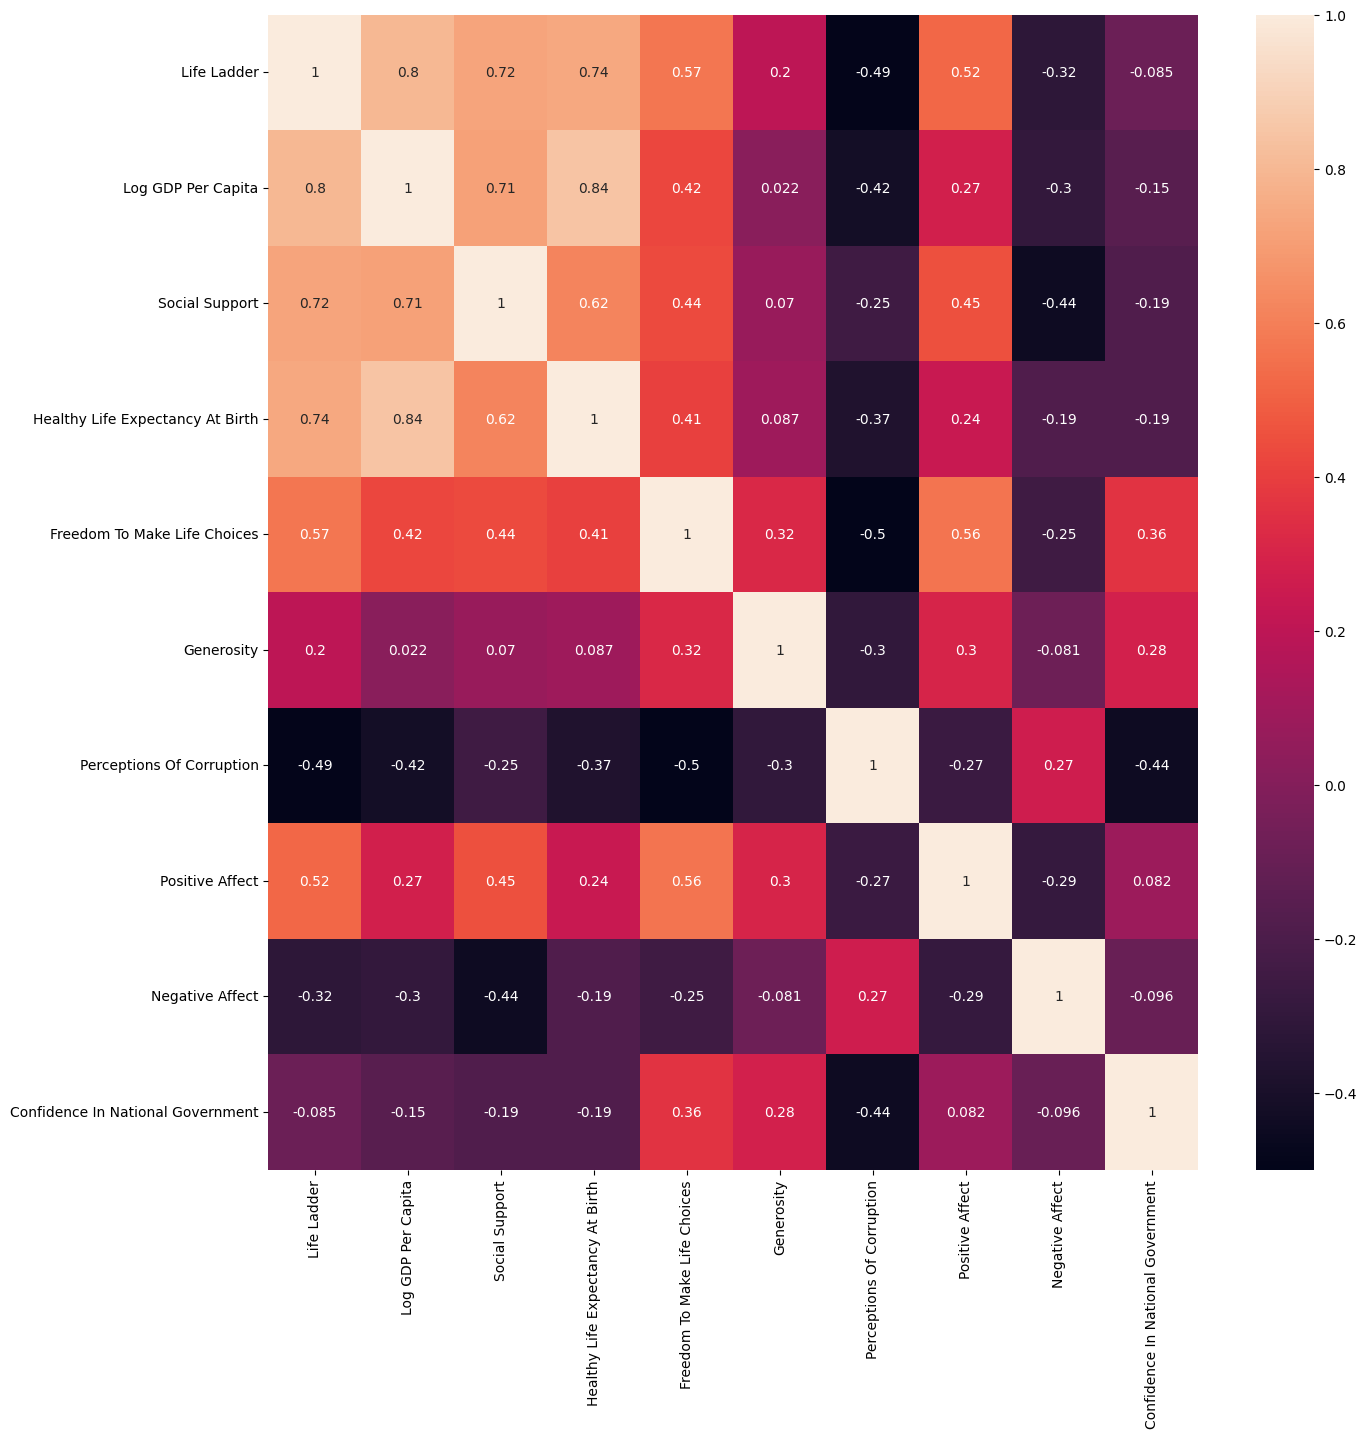

In [258]:
#Create a heatmap showing the correlations for the same features displayed in the above pair plot

plt.figure(figsize = (15,15))
sns.heatmap(clean_data[columns].corr(), annot= True)

plt.show()

Some strong coorelations for the harder metrics. Life expectancy and GDP are highly correlated. Life ladder scores and GDP are highly correlated. No suprise there. 
Otherwise there are a lot of very weak correlations between various features. A pretty messy picture overall. 

Maybe some exploration of regional differences, or of the possiblity that one particular type of country (high GDP vs Low etc.) is over or under represented will help shed some additional light here. 
It's also possible that this is just a messy data set. That's understandable given the challenge of collecting the data worldwide. 

#### Over represenation or underrepresentation in the data<a id=Overrepresenation or underrepresentation in the data></a>
We want to understand how our features impact the life ladder score across countries and across time in the data set. 
To understand this we need to make sure that no one year, region or country is really overrepresented in our data. 
We're looking for the overall realtionship, so having a lot of data from one region, or from wealthy countries could skew the results to be 
more relfective of that region or year, and less relfective of the overall trend.

Some features in the data set are more relevent in this regard than others. 
Features like life expectancy and GDP change slowly and are a broad indicator of the wealth of the country in question. 
We need to understand if our data is skewed towards rich countries or poor contries. We want a good cross section of countries in terms of wealth. 

Region is a similar feature. We should understand if there is a single region that is overrepresented in the data. 
Some regions contain more countries than others, so we should expect some variation. If the data were perfect we would have 
observations for each country for each year, and we could then determine what percent of the data would ideally be from each region based on the
number of data points from that region as a percent of the whole data set. 

Obviously the data set is not complete, so we'll be looking for regions that seem to have too many or too few obervations relative to their size in terms of number of countries. 

#### GDP<a id=GDP></a> 
Are there any patterns in our GDP feature that might indicate a skew towards wealthy or poor countries? 

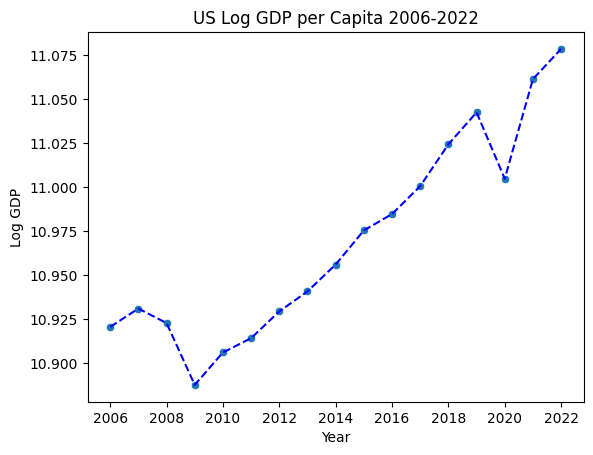

In [259]:
#How does GDP look for a single country with good representation across the data set? 

usa_data = clean_data[clean_data['Country Name']== 'United States']

sns.scatterplot(data = usa_data, x = usa_data['Year'], y=usa_data['Log GDP Per Capita'])

plt.plot(usa_data['Year'],usa_data['Log GDP Per Capita'], linestyle = '--', color = 'b')

plt.title('US Log GDP per Capita 2006-2022')
plt.xlabel('Year')
plt.ylabel('Log GDP')

plt.show();

The US is a major economy, and we can see a general upward trend here. Interesting that we can clearly see dips in the GDP metric 
during the 2008 financial crisis and the 2020 COVID pandemic. 

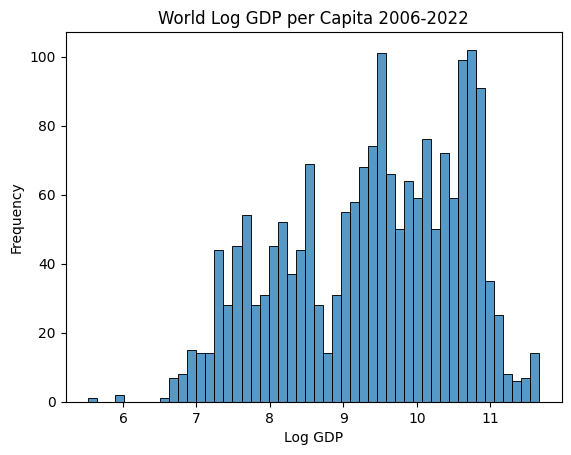

In [260]:
#How does it look for the whole data set across all years? 

sns.histplot(data = clean_data['Log GDP Per Capita'], bins = 50)

plt.title('World Log GDP per Capita 2006-2022')
plt.xlabel('Log GDP')
plt.ylabel('Frequency')

plt.show();

The above is a pretty broad look at the GDP feature. It's showing us all the GDP data points for all years. 
The points are separated from the year and the country, so we're just getting a broad look at what the data set contains. 

It's slightly skewed towards the left, but there isn't an obvious issue here. Looks like a wide array of values are represented and there is normal variation
due to the nature of the data we have. 

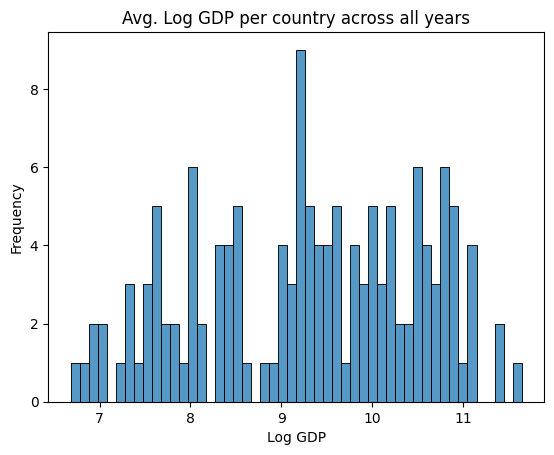

In [261]:
#What does it look like if we find the average Log GDP for each country across the data set

#Create a list of unique countries
country_list = clean_data['Country Name'].unique()

#Empty dict to hold our average GDP data - This will be helpful if we want to look something up later by country
avg_total_log_gdp = {}

#Loop through the data for each country and calcualte the average GDP across all years
for country in country_list:
    country_data = clean_data[clean_data['Country Name']== country]
 
    avg_gdp = country_data['Log GDP Per Capita'].mean()

    avg_total_log_gdp[country] = avg_gdp

#create a list for the historgram
hist_data = []
for value in avg_total_log_gdp.values():
    hist_data.append(value)


#plot the historgram
sns.histplot(data = hist_data, bins = 50)

plt.title('Avg. Log GDP per country across all years')
plt.xlabel('Log GDP')
plt.ylabel('Frequency')


plt.show();

Once we take away some of the variation by looking at the average for each country across the data set the distribution starts to look more normal. 
This makes sense if we assume that there are not giant changes in GDP over the course of our data set. 
More on that below. 


In [262]:
#calcualte descriptive statistics using mean and standard deviation

#mean
print('The mean of the distribution of average Log GDP across the data set is ' + str(np.mean(hist_data)))

#standard deviation
print('The standard deviation of the distribution of average Log GDP across the data set is ' + str(np.std(hist_data)))

#if we define an outlier as 3 standard deviations from the mean - where are out upper and lower bounds
upper_bound = np.mean(hist_data) + (3 * np.std(hist_data))
print('3 SD above the mean is '+ str(upper_bound))

lower_bound = np.mean(hist_data) - (3 * np.std(hist_data))
print('3 SD below the mean is '+ str(lower_bound))


The mean of the distribution of average Log GDP across the data set is 9.298379561596098
The standard deviation of the distribution of average Log GDP across the data set is 1.2195445640682614
3 SD above the mean is 12.957013253800882
3 SD below the mean is 5.639745869391314


In [263]:
#How many data points like 3 SD above or below the mean. 

outlier_below = []
outlier_above = []

for value in hist_data:
    if value < lower_bound:
        outlier_below.append(value)
    elif value > upper_bound:
        outlier_above.append(value)

print('There are ' + str(len(outlier_below)) + ' outliers below the mean')
print('There are ' + str(len(outlier_above)) + ' outliers above the mean')

There are 0 outliers below the mean
There are 0 outliers above the mean


So no outliers at all above or below the mean. Seems like a nice normal distribution.
But what if the mean isn't a good statisitc for the Log GDP feature across time? 
If there are big swings in GDP value across the years of our data set, then the mean might not be taking into account some of the that variaton. 

In [264]:
#What if we found the variation betweent the first year in the data set and the last year for each country and plotted those differences. 

#Define list of country names in data set
country_list = clean_data['Country Name'].unique()

#Empty dict to hold our change in GDP data by country
gdp_change = {}

#Loop through countries and calcualte the change in GDP at the end of the time in the data set. 
for country in country_list:
    country_data = clean_data[clean_data['Country Name']== country]
    
    #Sort the years from low to high
    country_data = country_data.sort_values(by = 'Year', ascending = True)
    #Pull the value for the first available year
    first_value = country_data['Log GDP Per Capita'].iloc[0]
    #Pull the value for the last available year
    last_value = country_data['Log GDP Per Capita'].iloc[-1]
    #Calulate the differece between the last year and the first year. 
    gdp_change[country] = last_value - first_value

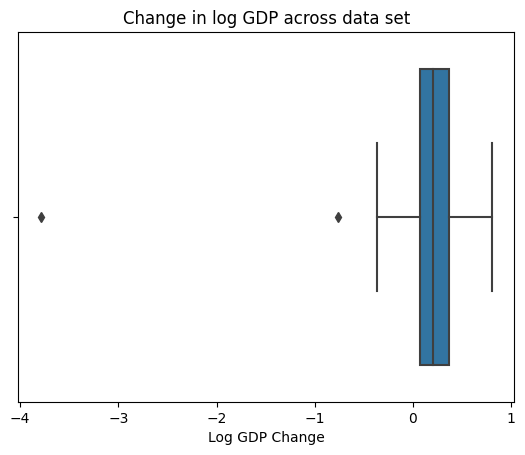

In [265]:
#Plot the distribution of the change in GDP values.

gdp_change_data = []
for value in gdp_change.values():
    gdp_change_data.append(value)


#sns.histplot(data = gdp_change_data, bins = 50)

sns.boxplot(x =gdp_change_data)

plt.title('Change in log GDP across data set')
plt.xlabel('Log GDP Change')

plt.show();

Looks like the changes in the GDP feature are clustered just above 0. 
Most countries seem to have had a small positive change over the timeframe we have data for. 
There are two outliers that bear further investigation. 

In [266]:
#what are the outliers here - a couple countries saw significant negative growth. Which countries are these? 

#Calcualte the lower bound of the boxplot (median - 1.5 IQR)
median = np.median(gdp_change_data)

iqr = np.percentile(gdp_change_data,75) - np.percentile(gdp_change_data,25)

lower_bound = np.percentile(gdp_change_data,25) - (1.5 * iqr)


for key, value in gdp_change.items():
    if value < lower_bound:
        print(key + ' is below the lower bound with a change in Log GDP of ' + str(value))


Venezuela is below the lower bound with a change in Log GDP of -3.789505481999999
Yemen is below the lower bound with a change in Log GDP of -0.763885973999999


So Yemen and Venezuela are the outliers we're seeing here. Let's explore those futher in terms of their GDP feature.

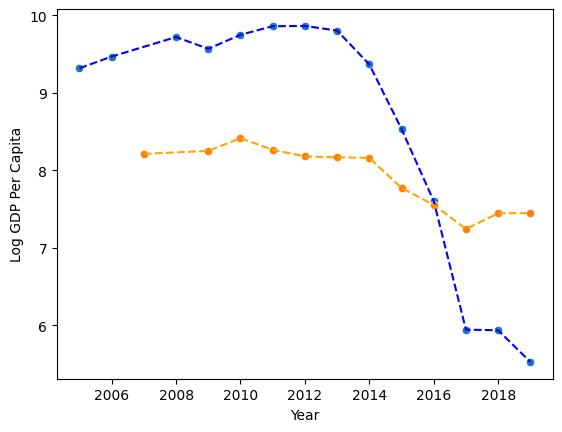

In [267]:
yemen_data  = clean_data[clean_data['Country Name']=='Yemen']
venezuela_data  = clean_data[clean_data['Country Name']=='Venezuela']

sns.scatterplot(data = venezuela_data, x = venezuela_data['Year'], y = venezuela_data['Log GDP Per Capita'])
sns.scatterplot(data = yemen_data, x = yemen_data['Year'], y = yemen_data['Log GDP Per Capita'])

plt.plot(venezuela_data['Year'],venezuela_data['Log GDP Per Capita'], linestyle = '--', color = 'b')
plt.plot(yemen_data['Year'],yemen_data['Log GDP Per Capita'], linestyle = '--', color = 'orange')

plt.show();

Looks like Yemen saw some shrinking of GPD but it's not as bad as the outlier status made it seem.
Venezuela on the other hand saw a precipitous drop starting around 2013. 
This coincides with a disputed Presidential election followed by what Wikipedia terms "a state of total economic collapse" (https://en.wikipedia.org/wiki/Economy_of_Venezuela).
Also mentioned are hyper inflation rates of 80,000% by 2018, 90% poverty rate, and defaults on the countries debts. 

An economic collapse like this in the context of the rest of our data should be seen as a black swan type event.
We should consider eliminating the Venezuelan data from future modeling to prevent one collapsing enonomy from skewing the results. 

Let see how a few of the other features in our data look for Venezula in the context of the economic decline. 


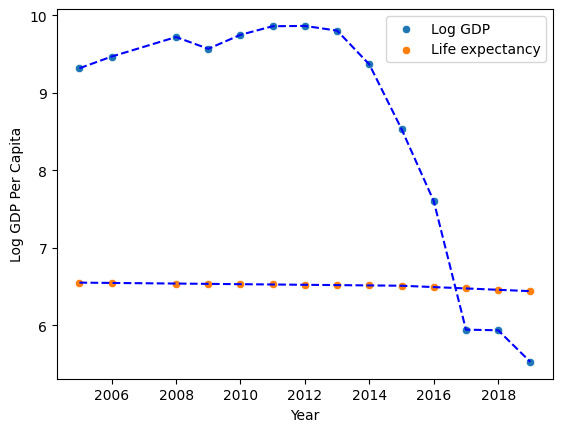

In [268]:
#Visualize GPD decline vs. (life expectancy)

sns.scatterplot(data = venezuela_data, x = venezuela_data['Year'], y = venezuela_data['Log GDP Per Capita'])
sns.scatterplot(data = venezuela_data, x = venezuela_data['Year'], y = venezuela_data['Healthy Life Expectancy At Birth'] / 10)

plt.plot(venezuela_data['Year'],venezuela_data['Log GDP Per Capita'], linestyle = '--', color = 'b')
plt.plot(venezuela_data['Year'],venezuela_data['Healthy Life Expectancy At Birth']/10, linestyle = '--', color = 'b')

plt.legend(['Log GDP', 'Life expectancy'],loc = 'upper right')
plt.show()

Looks like the crisis has not made a significant dent in life expectancy. It may just be too early to see the effect in the data. 

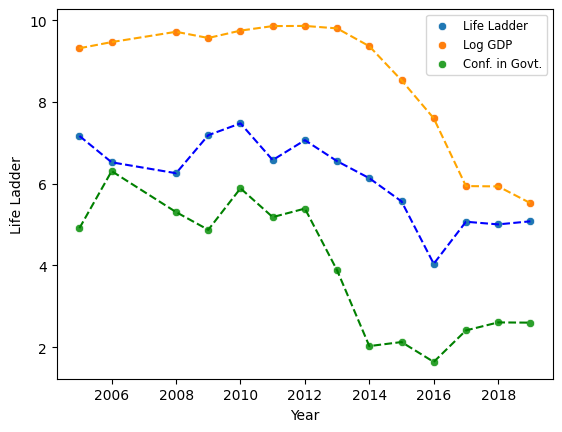

In [269]:
#visualize GPD decline vs. life ladder and corruption in confidence in government

sns.scatterplot(data = venezuela_data, x = venezuela_data['Year'], y = venezuela_data['Life Ladder'])
sns.scatterplot(data = venezuela_data, x = venezuela_data['Year'], y = venezuela_data['Log GDP Per Capita'])

#multiply the values here by 10 to normalize the scale of the features so that we can see the general trends
sns.scatterplot(data = venezuela_data, x = venezuela_data['Year'], y = venezuela_data['Confidence In National Government']*10)

plt.plot(venezuela_data['Year'],venezuela_data['Life Ladder'], linestyle = '--', color = 'blue')
plt.plot(venezuela_data['Year'],venezuela_data['Log GDP Per Capita'], linestyle = '--', color = 'orange')
plt.plot(venezuela_data['Year'],venezuela_data['Confidence In National Government']*10, linestyle = '--', color = 'green')

plt.legend(['Life Ladder', 'Log GDP', 'Conf. in Govt.'],loc = 'upper right', fontsize = 'small')
plt.show()

It appears that both the life ladder survey response and the Confidence in Govt. response have seen substantial declines as the economy has worsened. 
Not unexpected but it's good to see the lines moving in a way that makes intuitive sense. 

#### Life Expectancy<a id=Life Expectancy></a> 
Life expectancy has a very high positive correlation with Log GDP according the heat map produced above.
The Correlation is 0.84. 
Becasue of this, and because there doesn't appear to be significant skewness in the GPD numbers we would not expect 
a significant skew in life expectancy towards particularly long lived or short lived contries. 


#### Region<a id=Region></a> 
Do we have proportional representation for each region? Each geographic region has a certain number of countries in it and forms a certain percentage of the global total in terms of number of countries. 
We do not have good data for every country, so it's possible that some regions are over or under represented in our data relative to their actual proportion of the globe. 
This could be important if significant regional differences exist in terms of our features. We'll explore that question in the next section. 

Here we want to determine if we have roughly proportional representation in our data. 


The Encyclopedia Britannica (https://www.britannica.com/topic/list-of-countries-1993160) lists  a total of (Insert len counttires) in the world in 2023. 
The data we have includes many of these countries, but not all of them. Some did not appear in the original data set and some were removed during data cleaning and wrangling. 
The data set currently contains (num countires) out of the total of (insert number here.)

Which countries do we have and how does that break down by region. 

To answer this question, the Encyclopedia Britannica data was placed in a spreadsheet, and each country was labeled based on the regions provided in the original data set. 
Some smaller countires Micronesia or Polynesia, such as Tuvalu and Palau, did not easily fit into one of the existing regional categories. 
They have been put into either the 'North America and ANZ' region or the SouthEast Asia region based on their rough proximity to either Australia or more classically Asian countires like the Phillipines. 

One other note here is that while most of the regions coorespond roughly to geography, i.e. "Western Europe", there is also a political element to the classifications. 
For example, there is a separate region for the "Commonwealth of Independent States". This region is based on the old Soviet Republics (https://en.wikipedia.org/wiki/Commonwealth_of_Independent_States) and is treated as it's own region in the data set. In terms of pure geopgraphy, many of the countries in this data set more properly belong in either 'Central and Eastern Europe' or in various Asian regions (South, East, etc.).
The 'North America and ANZ' seems to follow a similar logic. North Americal and Australia are very far apart, but share a political and cultural affinity that makes thinking of them as a single region appropriate. 


In [270]:
#import the full data set for all countries in the world

all_countries = pd.read_csv('../data/raw/All_countries_with_regions.csv')

all_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  196 non-null    object
 1   Region        196 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


Looks like we have all the countries here and the data types are correct. There are no null values.
Let's visualize how our data matches up with the world in terms of regions.

The data set we have contains multiple entries for each country, so it we just count the region values we'll get a number that's far too high. 
We need to subset our data so that it's comparable to the data set for the world, which contains only one entry for each country and the associated region. 

In [271]:
#Create a new df from our data so that it matches the format of the all_countries data_set.
data_regions = clean_data[['Country Name','Regional Indicator']].groupby('Country Name').first().reset_index()

In [272]:
#generate a list of the world regions from the full world data
world_regions = all_countries['Region'].unique()

#create dicts for regional data in the full world data and the dataset we have
world_regions_dict = {}
dataset_regions_dict ={}


#loop through regions and calculate counts for how many times each occurs in the full world data and the data set we have
for item in world_regions:
    world_df = all_countries[all_countries['Region'] == item]
    dataset_df = data_regions[data_regions['Regional Indicator']== item]

    world_count = world_df['Region'].count()
    dataset_count = dataset_df['Regional Indicator'].count()

    world_regions_dict[item] = world_count
    dataset_regions_dict[item] = dataset_count


In [284]:
#Use the dicts of regional counts to create a dataframes for visualization

#combined_regions_data = pd.DataFrame({'World Countries':list( world_regions_dict.values()),'Dataset Countries':list(dataset_regions_dict.values()) }, index = list(dataset_regions_dict.keys()))
combined_regions_data_viz = pd.DataFrame({'World Countries':list( world_regions_dict.values()),'Dataset Countries':list(dataset_regions_dict.values()) }, index = list(dataset_regions_dict.keys()))
combined_regions_data_viz.head()


World Countries  Dataset Countries
Western Europe                      25                 20
Sub-Saharan Africa                  50                 40
Southeast Asia                      13                  6
South Asia                           8                  7
North America and ANZ               14                  4

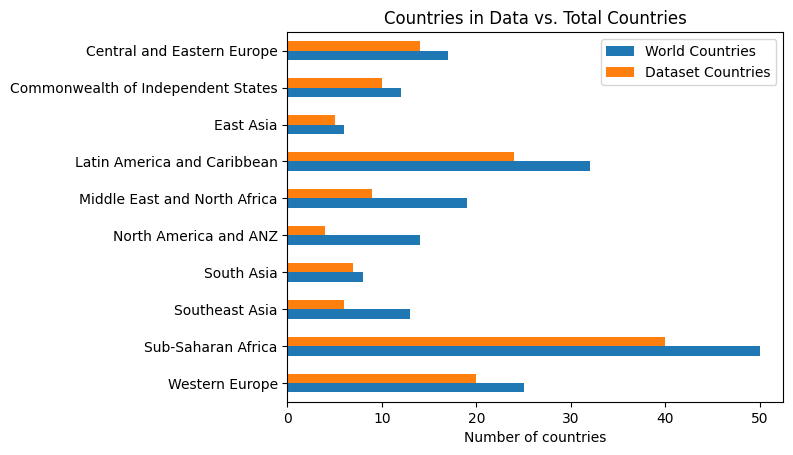

In [285]:
#Plot the data we have vs. the data for the planet side by side. 

combined_regions_data_viz.plot.barh()
plt.xlabel('Number of countries')

plt.title('Countries in Data vs. Total Countries')

plt.show()

It appears that our dataset is missing some countries in all of the world's regions. No region is complete in the data we have. 
Based on the visualization here it looks like we're missing about half of the Middle East and North Africa Region. 

We also have less than half of the North American and ANZ region. 
This is due to the addition of several very small polynesian countries to this region. 
These are all very small polities with very small populations. Their addition makes the number of countries appear higher, but it doesn't
add much in terms of population. 

Finally, Southeast Asia seems to have only about half the countries represented in our data set.

East Asia seems relatviely complete in terms of number of countries, but we know from earlier analysis that China is missing from the data. 
It was removed during the cleaning phase because there were multilple missing values, including values for perceptions of corruption and 
confidence in national government. 

All of this is interesting, but it's not something we can do much about. 
It's not possible to fill the gaps in our data set without conducting additional surveys in new countries, or conducting more complete surveys in places like China. 
Such an undertaking is obviously beyond the scope of this analysis. 

Given the number of missing countries, and the number of people in those countries, it seems ill advised to attempt to interpolate the missing data to improve the data set. 
Likewise, it seems ill advised to remove additional data to acheieve some sort of more proportional balance in the data we have. 
The choices as to what to leave in or remove would be arbitrary and it's hard to see how they would add anything to the final model aside from additional noise. 

Let's get another view of the data in terms of proportionality. 

In [286]:
#What percent of the worlds countries do we have in our data set?


combined_regions_data = pd.DataFrame({'World Countries':list( world_regions_dict.values()),'Dataset Countries':list(dataset_regions_dict.values()) }, index = list(dataset_regions_dict.keys()))

total_countries = combined_regions_data['World Countries'].sum()
dataset_countries = combined_regions_data['Dataset Countries'].sum()


print('The data set we have represents about ' + str(round(dataset_countries/total_countries,2)*100) + ' percent of the worlds countries.')

The data set we have represents about 71.0 percent of the worlds countries.


Pretty good. We are missing China, but we do have India in the data, so we're still capturing some very large populations.

In [287]:
# What proportion of the planet does each region represent?

# Calculate regional proportions for the world
combined_regions_data['world_proportion'] = round(combined_regions_data['World Countries']/ total_countries,3)*100

# Calculate regional proportions for the data we have
combined_regions_data['dataset_proportion'] = round(combined_regions_data['Dataset Countries']/ dataset_countries,3)*100

# Calculate the difference in regional proportions for the data we have
combined_regions_data['proportion_diff'] = combined_regions_data['dataset_proportion'] - combined_regions_data['world_proportion']

proportion_data = combined_regions_data[['world_proportion','dataset_proportion']]

combined_regions_data.head()

World Countries  Dataset Countries  world_proportion   
Western Europe                      25                 20              12.8  \
Sub-Saharan Africa                  50                 40              25.5   
Southeast Asia                      13                  6               6.6   
South Asia                           8                  7               4.1   
North America and ANZ               14                  4               7.1   

                       dataset_proportion  proportion_diff  
Western Europe                       14.4              1.6  
Sub-Saharan Africa                   28.8              3.3  
Southeast Asia                        4.3             -2.3  
South Asia                            5.0              0.9  
North America and ANZ                 2.9             -4.2

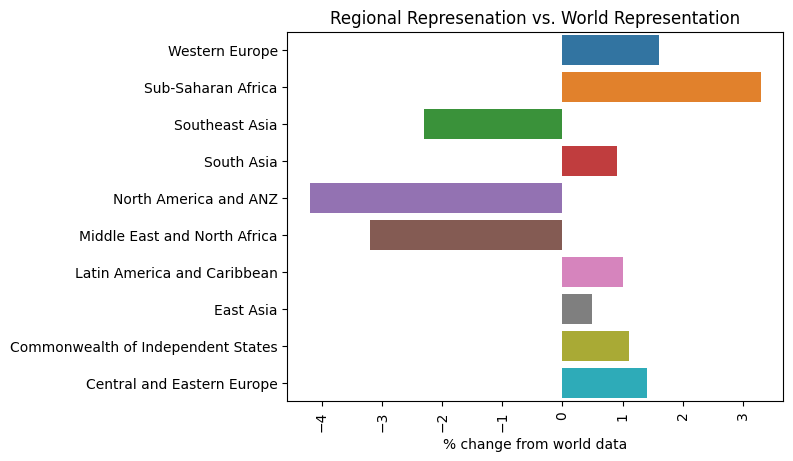

In [288]:
sns.barplot(data = combined_regions_data, y = combined_regions_data.index, x=combined_regions_data['proportion_diff'])
plt.xticks(rotation = 90)
plt. xlabel('% change from world data')

plt.title('Regional Represenation vs. World Representation')

plt.show()

In the last figure we saw that some regions in our dataset have less than half the constituent countries represented. 
This seems like a large discrepancy, but we can see based on the above that it's actually less serious than  it seems. 

Here we're seeing the difference in proportioality between the data we have the and the data for the world. 
For example, Western Europe as a region represents 12.8% of the total countries in the world. 
In our data set is represents 14.4% of the total number countries we have good data for.
So it's over-represented by about 1.6%  compared to what we would expect in an ideal scenario

We can see then that the biggest deviation in the data we have is in the North America and ANZ region, which is underrepresented by 4.2%.
As stated above, this region includes a number of small pacific nations for which we have no data, but which also have very generally small polities and populations.
Given the challenges in collecting the data, a deviation of only 4.2% seems completely accpetable. 

We can conclude from this that the regional data we have is broadly representative of the world as a whole. 
There are no outliers here that might skew the modeling process. 

#### Regional Variations<a id= Regional Variations></a>
With the knowledge that the regions in our data are broadly representative of the world as a whole, we can now explore regional variation. 
Are there regions in our data set that seem to be doing unusually well or unusually poorly? 

We'll take a look at the various regions through the lens of the life ladder score, which will be variable we'll eventually model. 


In [280]:
#Generate the average scores for each region across the data set.

life_ladder_by_region = clean_data.groupby('Regional Indicator')['Life Ladder'].mean()

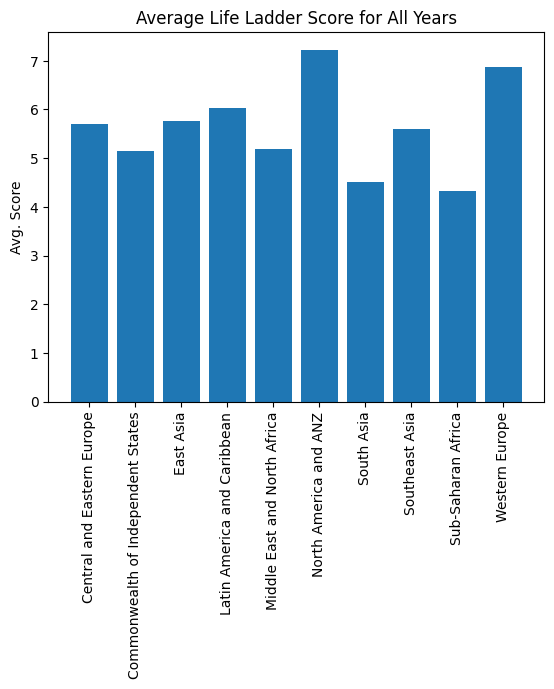

In [281]:
#Plot the average life ladder scores by region

fig,ax = plt.subplots()
ax.bar(life_ladder_by_region.index,life_ladder_by_region.values )
ax.set_xticks(life_ladder_by_region.index)
ax.set_xticklabels(life_ladder_by_region.index, rotation = 90)
ax.set_ylabel('Avg. Score')

plt.title('Average Life Ladder Score for All Years')

plt.show();



Some interesting observations here. North America and Western Europe have noticably higher average life ladder scores across all the years in the data set. 
Their scores are: 

North America and ANZ = 7.228132
Western Europe = 6.862299


The lowest scores are from South Asia and Sub-Saharan Africa:
South Asia = 4.520576
Sub-Saharan Africa = 4.335039

In terms of the average score, we're only seeing a couple of points difference between the lowest and highest scoring regions. That doesn't seem significant at first. 

If we look at the data as a percentage the picture becomes clearer. 
Just taking the highest and lowest regions as an example, we see that the average Life Ladder score for North America and ANZ is about 40%
higher than than the average score for Sub-Saharan Africa. That seems to be a significant difference, indicating some real variation in this feature across time. 

That being said, taking the average across all the years of the data could be smoothing over some variations by year. 
Could there be a couple years with higher or lower scores that are having a large effect on the overall average score? 

 


In [282]:
life_ladder_by_year = pd.DataFrame()
life_ladder_by_year.head(10)

for region in clean_data['Regional Indicator'].unique():
    region_data = clean_data[clean_data['Regional Indicator'] == region]
    life_ladder_by_year[region] = region_data.groupby('Year')['Life Ladder'].mean()
    

life_ladder_by_year.head(25)

South Asia  Sub-Saharan Africa  Latin America and Caribbean   
Year                                                                
2006    4.644593            4.071953                     5.691576  \
2007    4.893733            4.380688                     5.846191   
2008    4.534499            4.280261                     5.900270   
2009    4.723865            4.348281                     6.366542   
2010    4.786475            4.156947                     6.313760   
2011    4.451573            4.455098                     6.129442   
2012    4.469489            4.302363                     6.098579   
2013    4.619499            4.049160                     6.159445   
2014    4.544003            4.107721                     6.060082   
2015    4.612539            4.236246                     5.940901   
2016    4.720707            4.181097                     5.896981   
2017    4.319351            4.435054                     6.002161   
2018    4.304709            4.562399                     5.951091   
2019    4.140470            4.532834                     6.117600   
2020    4.977744            4.763240                     5.748936   
2021    3.888365            4.485700                     5.991503   
2022    4.270508            4.288254                     6.210616   

      Commonwealth of Independent States  North America and ANZ   
Year                                                              
2006                            4.795015               7.243404  \
2007                            4.887174               7.471001   
2008                            5.106947               7.350230   
2009                            4.902111               7.322928   
2010                            4.913759               7.371941   
2011                            4.955284               7.284362   
2012                            5.134459               7.221647   
2013                            5.219223               7.371850   
2014                            5.217434               7.262454   
2015                            5.129308               7.250975   
2016                            5.021088               7.131053   
2017                            5.200017               7.247712   
2018                            5.254002               7.151365   
2019                            5.475332               7.122987   
2020                            5.686265               7.111936   
2021                            5.536263               7.036706   
2022                            5.530991               6.905102   

      Western Europe  Central and Eastern Europe   
Year                                               
2006        6.881718                    5.422188  \
2007        7.020117                    5.202871   
2008        7.165480                    5.383746   
2009        6.772409                    5.128277   
2010        6.756548                    5.224425   
2011        6.778830                    5.284115   
2012        6.793845                    5.378752   
2013        6.681949                    5.414485   
2014        6.671540                    5.532341   
2015        6.732810                    5.597364   
2016        6.813916                    5.752557   
2017        6.891960                    5.924294   
2018        6.965981                    6.070206   
2019        7.014725                    6.040464   
2020        6.919509                    6.220395   
2021        6.921246                    6.362425   
2022        6.892661                    6.356753   

      Middle East and North Africa  East Asia  Southeast Asia  
Year                                                           
2006                      6.624482   5.677472        5.595355  
2007                      5.563169   5.538178        5.806265  
2008                      5.660031   5.295652        5.497917  
2009                      5.858093   5.629915        5.471459  
2010                      5.562047   5.725933  

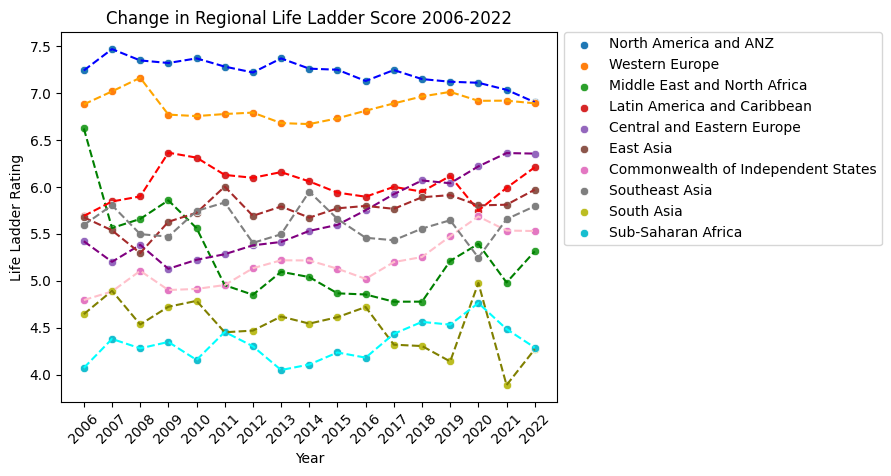

In [283]:

sns.scatterplot(data =life_ladder_by_year , x = life_ladder_by_year.index, y = life_ladder_by_year['North America and ANZ'],  label = 'North America and ANZ') #,label = 'North America and ANZ'
sns.scatterplot(data =life_ladder_by_year , x = life_ladder_by_year.index, y = life_ladder_by_year['Western Europe'],label = 'Western Europe') #,label = 'Western Europe'
sns.scatterplot(data =life_ladder_by_year , x = life_ladder_by_year.index, y = life_ladder_by_year['Middle East and North Africa'], label = 'Middle East and North Africa') #, label = 'Middle East and North Africa'
sns.scatterplot(data =life_ladder_by_year , x = life_ladder_by_year.index, y = life_ladder_by_year['Latin America and Caribbean'],label = 'Latin America and Caribbean') #,  label = 'Latin America and Caribbean'
sns.scatterplot(data =life_ladder_by_year , x = life_ladder_by_year.index, y = life_ladder_by_year['Central and Eastern Europe'], label = 'Central and Eastern Europe') #, label = 'Central and Eastern Europe'
sns.scatterplot(data =life_ladder_by_year , x = life_ladder_by_year.index, y = life_ladder_by_year['East Asia'], label = 'East Asia') #, label = 'East Asia'

sns.scatterplot(data =life_ladder_by_year , x = life_ladder_by_year.index, y = life_ladder_by_year['Commonwealth of Independent States'],label = 'Commonwealth of Independent States') #,label = 'Commonwealth of Independent States'
sns.scatterplot(data =life_ladder_by_year , x = life_ladder_by_year.index, y = life_ladder_by_year['Southeast Asia'], label = 'Southeast Asia') #, label = 'Southeast Asia'

sns.scatterplot(data =life_ladder_by_year , x = life_ladder_by_year.index, y = life_ladder_by_year['South Asia'],label = 'South Asia') # label = 'South Asia'
sns.scatterplot(data =life_ladder_by_year , x = life_ladder_by_year.index, y = life_ladder_by_year['Sub-Saharan Africa'], label = 'Sub-Saharan Africa') #, label = 'Sub-Saharan Africa'


#Plot trend lines for each region

plt.plot(life_ladder_by_year.index,life_ladder_by_year['North America and ANZ'], linestyle = '--', color = 'blue')
plt.plot(life_ladder_by_year.index,life_ladder_by_year['Western Europe'], linestyle = '--', color = 'orange')
plt.plot(life_ladder_by_year.index,life_ladder_by_year['Middle East and North Africa'], linestyle = '--', color = 'green')
plt.plot(life_ladder_by_year.index,life_ladder_by_year['Latin America and Caribbean'], linestyle = '--', color = 'red')
plt.plot(life_ladder_by_year.index,life_ladder_by_year['Central and Eastern Europe'], linestyle = '--', color = 'purple')
plt.plot(life_ladder_by_year.index,life_ladder_by_year['East Asia'], linestyle = '--', color = 'brown')
plt.plot(life_ladder_by_year.index,life_ladder_by_year['Commonwealth of Independent States'], linestyle = '--', color = 'pink')
plt.plot(life_ladder_by_year.index,life_ladder_by_year['Southeast Asia'], linestyle = '--', color = 'grey')
plt.plot(life_ladder_by_year.index,life_ladder_by_year['South Asia'], linestyle = '--', color = 'olive')
plt.plot(life_ladder_by_year.index,life_ladder_by_year['Sub-Saharan Africa'], linestyle = '--', color = 'cyan')



plt.xticks(life_ladder_by_year.index, rotation = 45)
plt.ylabel('Life Ladder Rating')


plt.legend(bbox_to_anchor = (1,1.02), loc = 'upper left')
plt.title('Change in Regional Life Ladder Score 2006-2022')

#'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

plt.show()

The visualization above shows the life ladder scores across our data set for each region. 
Visually, the trend seems to be divided into 3 categories. 
Most obvious is the separation at the top of the graph between the "North American and ANZ" and "Western Europe" regions and the rest of the world. 
Aside from a single data point (North Africa and the Middle East in 2006), these two regions stand well apart. 
These also happen to be the regions that contain many of the most developed and wealthiest countries including the United States, France, Germany, Canada, Autralia etc.
Scores in these regions appear to have relatively little variability and they never stray below a score of 6.6

Below these two wealthy regions we see a jumble that makes up most of the remaining regions. Scores in this area appear more volitile and there is considerable
variation across the years. This is most notable in the line for the "Middle East and North Africa", but it can be seen to a lesser degree in other regions as well. 
Scores in this section top out at 6.6 in 2006 although this seems like an outlier. The low for this group is 4.77, again for the "Middle East and North Africa",
but most scores are well above 5 in this group. Scores here tend to hover between 5 and 6.5. 

Finally, there are two regions at the bottom of the chart that never show scores above 5. There regions are "South Asia" and "Sub-Saharan Africa". 
Both these regions contain a large number of relatively poor or developing countries, including Afganistan and Bangladesh in South Asia and Somalia and Ethiopia in Sub-Saharan Africa
Scores for this segment top out at 4.9 and have a low of 3.8. No other regions in the data set drop below 4.5, let alone below 3. 

These rough divisions in the "Life Ladder" feature show that there is good variablity in the feature and that something about the countries in these regions must be driving the difference in scores.
The drivers of these differences will hopefully become clearer in the modeling stages.


#### Conclusion<a id= Conclusion></a>
Despite the challenges of gathering survey data, and the removal of some data cleaning, we still have a fairly robust data set here. 
It's not perfect, but it seems to be broadly representative of the world in a general sense. 

We don't have any obvious reasons to think that one region or one group of countries is being grossly overrepresented. 

That being said, it's also not at all obvious at this step what the actual relationships between all the features in the data set really are.
Nor is is clear how the features realte to the "Life Ladder Score" if they do at all. When looked at visually, the data is messy, with few clear relationships. 
There are also some relationships in terms of mathematical correlation that don't seem to match how the data looks when visualized. 

We'll have to rely on the future modeling process to tease out some of these relationships further. 